<a href="https://colab.research.google.com/github/ALEJODATA/Temporary_add_to_version_control/blob/master/Pokemon_Speed_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#Load The Dataset

In [8]:
from google.colab import drive

drive.mount('/content/drive')

MessageError: ignored

In [7]:
import pandas as pd

original_df = pd.read_csv('Pokemon.csv')

original_df

FileNotFoundError: ignored

In [ ]:
#2. Select Feautures#

In [ ]:
modified_df = original_df[['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']]

modified_df.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,45,49,49,65,65,45
1,60,62,63,80,80,60
2,80,82,83,100,100,80
3,80,100,123,122,120,80
4,39,52,43,60,50,65


In [ ]:
#3. Split into 3 Partitions: Train,Val & Test

In [ ]:
shuffled_df = modified_df.sample(frac=1) #we don't loose any data, we just moving them around

shuffled_df.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
409,95,145,130,120,90,120
200,70,100,115,30,65,30
728,85,56,77,50,77,78
36,90,92,87,75,85,76
499,68,72,78,38,42,32


In [ ]:
train_df = shuffled_df[:500]
val_df   = shuffled_df[500:650]
test_df  = shuffled_df[650:]

len(train_df), len(val_df), len(test_df)

(500, 150, 150)

In [ ]:
X_train, y_train = train_df.to_numpy()[:,:-1],train_df.to_numpy()[:,-1]
X_val, y_val = val_df.to_numpy()[:,:-1],val_df.to_numpy()[:,-1]
X_test, y_test = test_df.to_numpy()[:,:-1],test_df.to_numpy()[:,-1]

#Shows the (rows,columns of X,column in Y)

(X_train.shape,y_train.shape),(X_val.shape, y_val.shape),(X_test.shape, y_test.shape)

(((500, 5), (500,)), ((150, 5), (150,)), ((150, 5), (150,)))

In [ ]:
#4. Preprocess The Inputs

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>],
       [<AxesSubplot:title={'center':'4'}>, <AxesSubplot:>]], dtype=object)

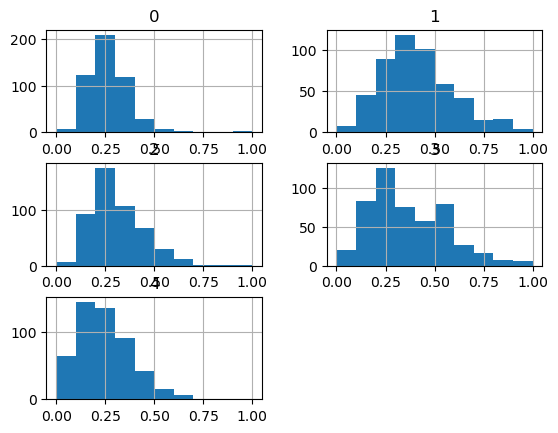

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(X_train)

X_train_scaled, X_val_scaled, X_test_scaled = scaler.transform(X_train), scaler.transform(X_val), scaler.transform(X_test)

pd.DataFrame(X_train_scaled).hist()

In [ ]:
#5. Pick The Best Model w/ Lowest Validation Error

In [ ]:
from sklearn.metrics import mean_absolute_error

average_speed = y_train.mean()

mean_absolute_error(y_val, [average_speed]*len(y_val))

24.736853333333336

In [ ]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression().fit(X_train, y_train)

mean_absolute_error(y_val, linear_model.predict(X_val))

20.431660486338554

In [ ]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor().fit(X_train, y_train)

mean_absolute_error(y_val, random_forest.predict(X_val))

21.423344444444446

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from tensorflow.keras.optimizers import Adam

model_1 = Sequential([layers.Input((5,)),
                      layers.Dense(1)])

model_1.compile(loss='mse', optimizer=Adam(learning_rate=0.01), metrics=['mean_absolute_error'])

model_1.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), epochs=100)

ModuleNotFoundError: No module named 'tensorflow'

model_1.summary()

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from tensorflow.keras.optimizers import Adam

model_2 = Sequential([layers.Input((5,)),
                      layers.Dense(32),
                      layers.Dense(32),
                      layers.Dense(1)])

model_2.compile(loss='mse', optimizer=Adam(learning_rate=0.01), metrics=['mean_absolute_error'])

model_2.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), epochs=100)

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
model_2.summary()

NameError: name 'model_2' is not defined

In [ ]:
#6. Evaluate The Chosen Model

In [ ]:
mean_absolute_error(y_test,linear_model.predict(X_test))

NameError: name 'mean_absolute_error' is not defined